# MAGIC Gamma Telescope Data Set

## Data Set Information

The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
Forschungszentrum Karlsruhe FZKA 6019 (1998).

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

### Attribute Information

1. **fLength:** continuous. Major axis of ellipse [mm]
2. **fWidth:** continuous. Minor axis of ellipse [mm]
3. **fSize:** continuous. 10-log of sum of content of all pixels [in #phot]
4. **fConc:** continuous. Ratio of sum of two highest pixels over fSize [ratio]
5. **fConc1:** continuous. Ratio of highest pixel over fSize [ratio]
6. **fAsym:** continuous. Distance from highest pixel to center, projected onto major axis [mm]
7. **fM3Long:** continuous. 3rd root of third moment along major axis [mm]
8. **fM3Trans:** continuous. 3rd root of third moment along minor axis [mm]
9. **fAlpha:** continuous. Angle of major axis with vector to origin [deg]
10. **fDist:** continuous. Distance from origin to center of ellipse [mm]
11. **class:** categorical. Values: gamma (signal), hadron (background)

g = gamma (signal): 12332  
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.

### Source

**Original Owner:**  
  
R. K. Bock  
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)  
http://wwwmagic.mppmu.mpg.de  
rkb@mail.cern.ch  
  
**Donor:**
  
P. Savicky  
Institute of Computer Science, AS of CR  
Czech Republic  
savicky@cs.cas.cz

### Citations

- Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope). Irvine, CA: University of California, School of Information and Computer Science.

## Main Objectives

- Use neural networks to classify the simulated high energy gamma particles.
- Compare the results with the resutls of traditional ML algorithms.
- Focus on prediciton rather than interpretability.

## Load data

In [1]:
import pandas as pd

In [2]:
names = ['fLength', 'fWidt', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [3]:
data = pd.read_csv('magic04.data', sep = ',', header=None, names=names)

## Data Cleaning

In [4]:
data.shape

(19020, 11)

In [5]:
data.head()

,fLength,fWidt,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Redundant columns

In [6]:
non_redundant = [i for i in data.columns if len(data[i].unique()) != 1]
df = data.loc[:, non_redundant]

### Duplicates

In [7]:
df.index.is_unique

True

In [8]:
df.duplicated().sum()

115

In [9]:
(df.duplicated().sum()/df.shape[0])*100

0.6046267087276551

The **115** duplicated rows represents only the 0.6% of the data. However, in this dataset is possible to have duplicated values. None will be removed.

### Missing Values

In [10]:
df.isnull().sum()

fLength     0
fWidt       0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

There is **0** missing values.

### Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidt     19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


- The *float64* data type can be downcasted to optimize memory usage.
- The *Object* data type can be changed to boolean or category to optimize memory usage.

In [12]:
floats = [i for i in names if i != 'class']

In [13]:
for i in floats:
    df[i] = pd.to_numeric(df[i], downcast="float")

In [14]:
df['class'] = df['class'].astype('category')

## Exploratory Data Analysis

### Correlation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

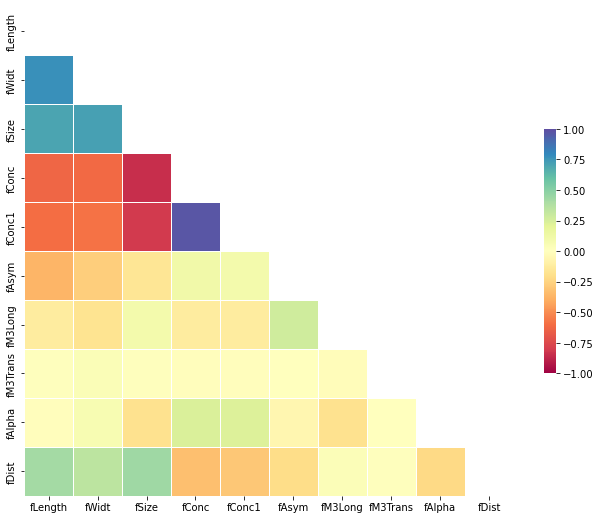

In [16]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Spectral', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation Table

In [17]:
def round2(x):
    from math import ceil
    if x >= 0:
        return ceil(x*10)/10
    else:
        return round(x, 1)

In [18]:
def corr_label(x):
    cl = {1:'Perfect +', 0.9:'Very strong +', 0.8:'Strong +', 0.7:'Strong +', 0.6:'Moderate +', 0.5:'Moderate +', 0.4:'Weak +', 0.3:'Weak +', 0.2:'Very weak +', 0.1:'Very weak +', 0:'No corr',
          -1:'Perfect -', -0.9:'Very strong -', -0.8:'Strong -', -0.7:'Strong -', -0.6:'Moderate -', -0.5:'Moderate -', -0.4:'Weak -', -0.3:'Weak -', -0.2:'Very weak -', -0.1:'Very weak -',}
    
    if x in cl.keys():
        return cl[x]
    else:
        return ''

In [19]:
def background_colors(styler):
    styler.set_caption('Correlation Coefficients Interpretation')
    styler.format(corr_label)
    styler.background_gradient(axis=None, vmin=-1, vmax=1, cmap='Spectral')
    styler.applymap(lambda x: 'background-color : white' if np.isnan(x) else '')
    return styler

In [20]:
corr = corr.applymap(round2)
corr_diag = corr.where(mask)
corr_diag.style.pipe(background_colors)

,fLength,fWidt,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,Perfect +,Strong +,Strong +,Moderate -,Moderate -,Weak -,Very weak -,Very weak +,No corr,Moderate +
fWidt,,Perfect +,Strong +,Moderate -,Moderate -,Weak -,Very weak -,Very weak +,Very weak +,Weak +
fSize,,,Perfect +,Very strong -,Strong -,Very weak -,Very weak +,Very weak +,Very weak -,Moderate +
fConc,,,,Perfect +,Perfect +,Very weak +,Very weak -,No corr,Weak +,Weak -
fConc1,,,,,Perfect +,Very weak +,Very weak -,No corr,Weak +,Weak -
fAsym,,,,,,Perfect +,Weak +,Very weak +,Very weak -,Very weak -
fM3Long,,,,,,,Perfect +,No corr,Very weak -,Very weak +
fM3Trans,,,,,,,,Perfect +,Very weak +,Very weak +
fAlpha,,,,,,,,,Perfect +,Very weak -
fDist,,,,,,,,,,Perfect +


### Skewness per feature

In [21]:
skewness = [pd.Series({'Skewness':df[i].skew()}) for i in floats]
skewness_df = pd.concat(skewness, axis = 1).T.set_index(pd.Index(floats))
skewness_df['Normal'] = abs(skewness_df['Skewness']).lt(0.5)
skewness_df

,Skewness,Normal
fLength,2.013652,False
fWidt,3.371628,False
fSize,0.875507,False
fConc,0.485888,True
fConc1,0.685695,False
fAsym,-1.046441,False
fM3Long,-1.123078,False
fM3Trans,0.120121,True
fAlpha,0.850890,False
fDist,0.229587,True


- A feature is considered normally distributed if its skewness' absoulte value < 0.5

### Feature Distribution Visualization

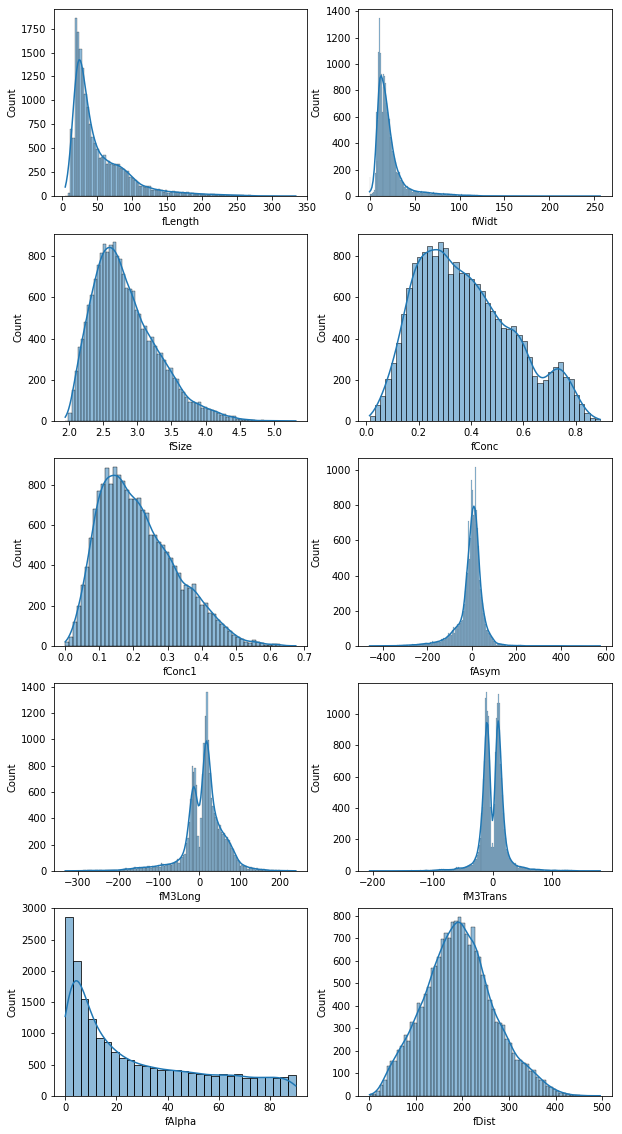

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, j in zip(floats, axes.flatten()):
    sns.histplot(x = df[i], ax=j, kde=True)

There seems to multimodality in some feature's distributions, which is expected given the amount of categorical variables in the dataset.

### Outliers

#### Identifying outliers with z-score

In [23]:
from scipy import stats

In [24]:
# Identify values > 2.698, which means they are outside of a normal distribution's 99.66% interval.
max_value = 2.698
outliers = []

for i in floats:
    z_score = stats.zscore(df[i])
    mask = abs(z_score) > max_value 
    if sum(mask) != 0:
        outliers.append({'Feature':i, 'Mask':mask})

##### Number of outliers per feature

In [25]:
for i in outliers:
    print(i['Feature'], ':', sum(i['Mask']))

fLength : 563
fWidt : 600
fSize : 295
fConc : 10
fConc1 : 167
fAsym : 541
fM3Long : 551
fM3Trans : 529
fDist : 86


#### Visualizing Outliers in relationship with **class**

In [26]:
plot_data = df.copy()

In [27]:
for i in outliers:
    x = i['Mask'].apply(lambda x: 'Outlier' if x else 'Normal')
    plot_data[i['Feature'] + '_outlier'] = x

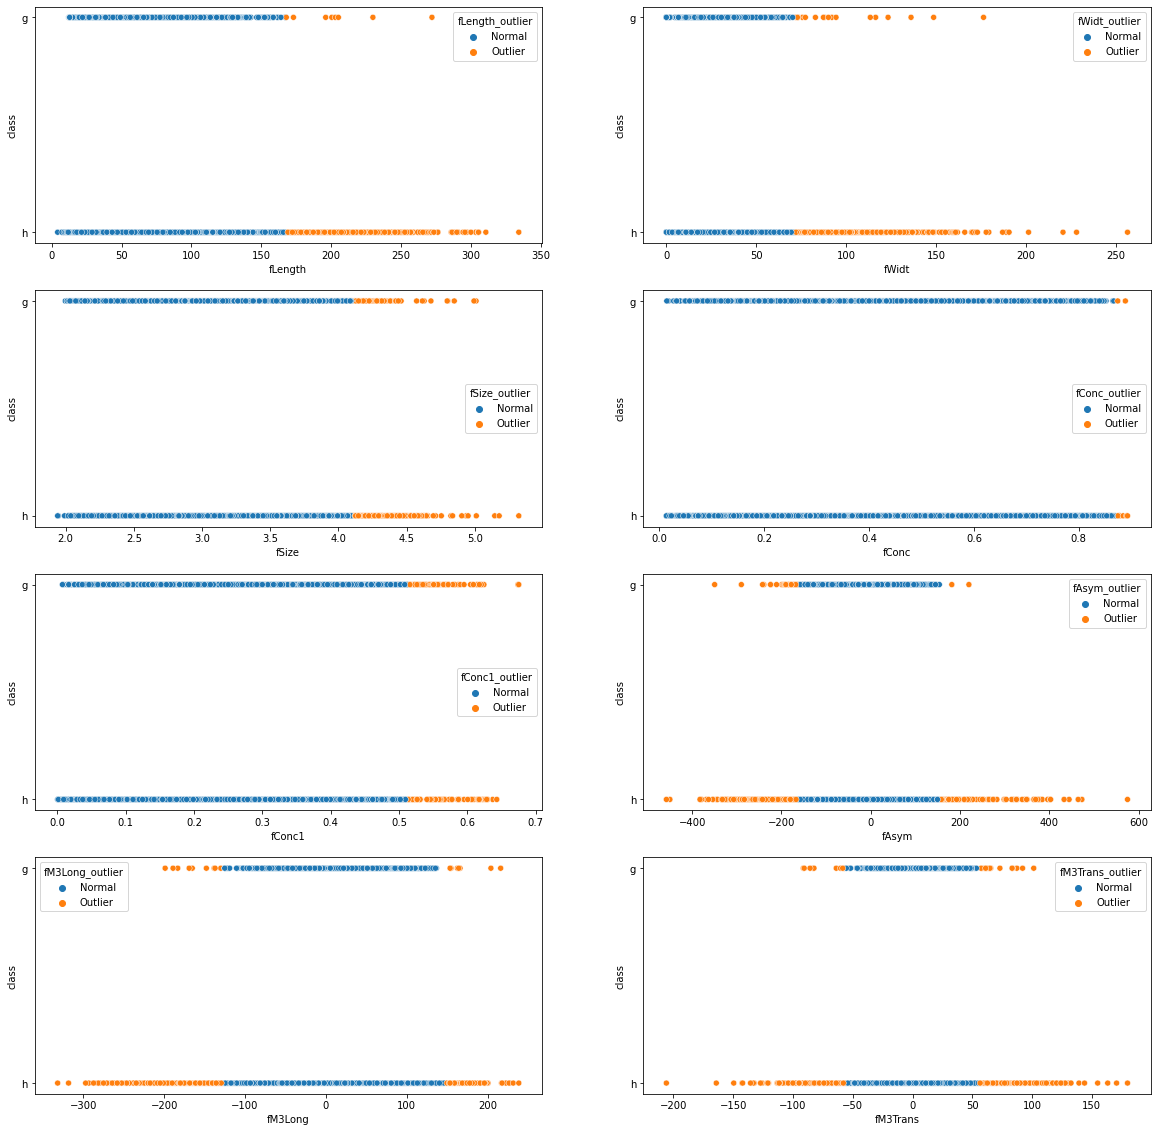

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

for i, j in zip(floats, axes.flatten()):
    if i + '_outlier' in plot_data.columns:
        sns.scatterplot(data=plot_data, x=i, y='class', ax=j, hue=i + '_outlier')
    else:
        sns.scatterplot(data=plot_data, x=i, y='class', ax=j)

- The outliers were purposefully introduced by the simulation. They will not be deleted or modified.

#### Visualizing **class** distribution

<AxesSubplot:xlabel='class', ylabel='Count'>

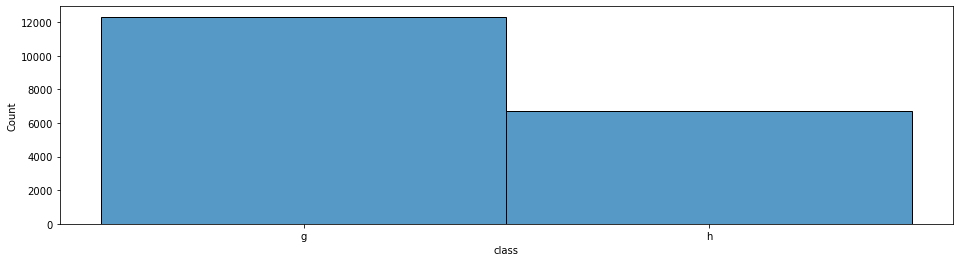

In [29]:
plt.figure(figsize=(16,4))
sns.histplot(x = df['class'])

In [30]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

The dataset is unbalanced.

## Classification

### Binary Encoding

In [31]:
df['class'] = df['class'].replace(to_replace={'g':1, 'h':0})

### Train - test split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
model_data = df.copy()
X = model_data.loc[:, model_data.columns != 'class']
y = model_data.loc[:, ['class']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify = y)

In [35]:
y_train, y_test = np.ravel(y_train), np.ravel(y_test)

### Standard Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
Xf_train_scaled, Xf_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [38]:
Xfs_train = pd.DataFrame(Xf_train_scaled, index=X_train.index, columns=floats)
Xfs_test = pd.DataFrame(Xf_test_scaled, index=X_test.index, columns=floats)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
max_features = round(np.sqrt(X.shape[1]))-1
RF = RandomForestClassifier(max_features=max_features, random_state=0)
RF.fit(Xfs_train,y_train)
RF_pred = RF.predict(Xfs_test)
RF_pred_prob = RF.predict_proba(Xfs_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

Text(51.0, 0.5, 'Ground Truth')

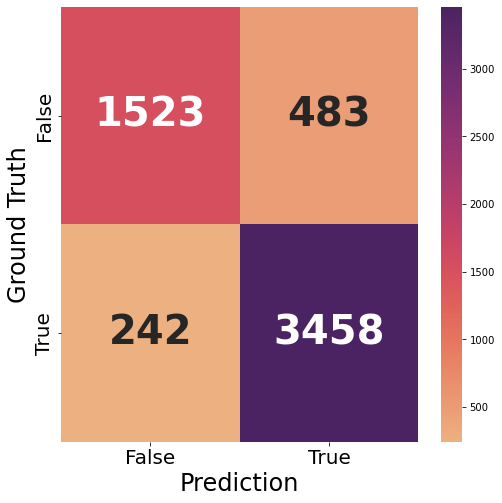

In [42]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, RF_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='flare')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=20);
ax.set_yticklabels(labels, fontsize=20);
ax.set_xlabel('Prediction', fontsize=24);
ax.set_ylabel('Ground Truth', fontsize=24)

In [43]:
RF_cr = classification_report(y_test, RF_pred, target_names=RF.classes_, output_dict =True)
del RF_cr['accuracy']
pd.DataFrame(RF_cr).T

,precision,recall,f1-score,support
0,0.862890,0.759222,0.807743,2006.0
1,0.877442,0.934595,0.905117,3700.0
macro avg,0.870166,0.846908,0.856430,5706.0
weighted avg,0.872326,0.872941,0.870884,5706.0


In [44]:
print('ROC Area under the curve is {:.3f}'.format(roc_auc_score(y_test, RF_pred_prob[:,1])))

ROC Area under the curve is 0.932


### Neural Networks

#### No. 1
- Three dense layers ('ReLU', 'ReLU', 'Sigmoid')
- 100 epochs

In [45]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [46]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [47]:
NN = Sequential()
NN.add(Dense(10, input_shape=(10,), activation="relu"))
NN.add(Dense(5,  activation="relu"))
NN.add(Dense(1, activation="sigmoid"))

In [48]:
with HiddenPrints():
    NN.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
    NN_hist= NN.fit(Xfs_train, y_train, validation_data=(Xfs_test, y_test), epochs=100)

In [49]:
with HiddenPrints():
    NN_pred_class = (NN.predict(Xfs_test) > 0.5).astype("int32")
    NN_pred_prob = NN.predict(Xfs_test)

Text(51.0, 0.5, 'Ground Truth')

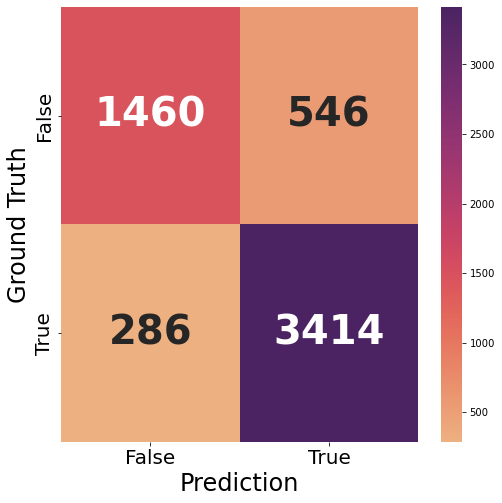

In [50]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, NN_pred_class), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='flare')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=20);
ax.set_yticklabels(labels, fontsize=20);
ax.set_xlabel('Prediction', fontsize=24);
ax.set_ylabel('Ground Truth', fontsize=24)

In [51]:
NN_cr = classification_report(y_test, NN_pred_class, target_names=RF.classes_, output_dict =True)
del NN_cr['accuracy']
pd.DataFrame(NN_cr).T

,precision,recall,f1-score,support
0,0.836197,0.727817,0.778252,2006.0
1,0.862121,0.922703,0.891384,3700.0
macro avg,0.849159,0.825260,0.834818,5706.0
weighted avg,0.853007,0.854189,0.851611,5706.0


In [52]:
print('ROC Area under the curve is {:.3f}'.format(roc_auc_score(y_test, NN_pred_prob)))

ROC Area under the curve is 0.906


#### No. 2
- Five dense layers ('ReLU', 'ReLU', 'ReLU', 'ReLU', 'Sigmoid')
- 100 epochs

In [53]:
NN2 = Sequential()
NN2.add(Dense(10, input_shape=(10,), activation="relu"))
NN2.add(Dense(8,  activation="relu"))
NN2.add(Dense(6, activation="relu"))
NN2.add(Dense(4,  activation="relu"))
NN2.add(Dense(1, activation="sigmoid"))

In [54]:
with HiddenPrints():
    NN2.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
    NN2_hist= NN2.fit(Xfs_train, y_train, validation_data=(Xfs_test, y_test), epochs=100)

In [55]:
with HiddenPrints():
    NN2_pred_class = (NN2.predict(Xfs_test) > 0.5).astype("int32")
    NN2_pred_prob = NN2.predict(Xfs_test)

Text(51.0, 0.5, 'Ground Truth')

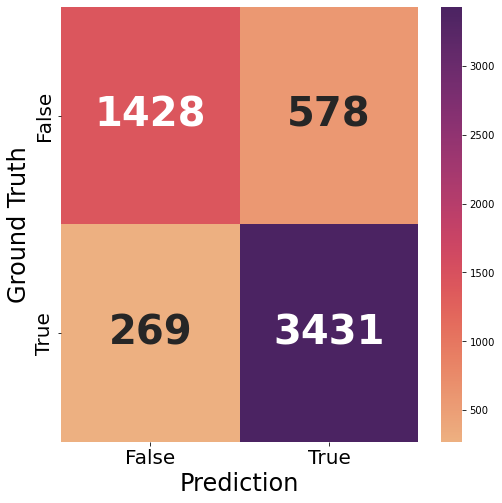

In [56]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, NN2_pred_class), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='flare')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=20);
ax.set_yticklabels(labels, fontsize=20);
ax.set_xlabel('Prediction', fontsize=24);
ax.set_ylabel('Ground Truth', fontsize=24)

In [57]:
NN2_cr = classification_report(y_test, NN2_pred_class, target_names=RF.classes_, output_dict =True)
del NN2_cr['accuracy']
pd.DataFrame(NN2_cr).T

,precision,recall,f1-score,support
0,0.841485,0.711864,0.771267,2006.0
1,0.855824,0.927297,0.890128,3700.0
macro avg,0.848655,0.819581,0.830697,5706.0
weighted avg,0.850783,0.851560,0.848341,5706.0


In [58]:
print('ROC Area under the curve is {:.3f}'.format(roc_auc_score(y_test, NN2_pred_prob)))

ROC Area under the curve is 0.907


#### No. 3
- Five dense layers ('ReLU', 'ReLU', 'ReLU', 'ReLU', 'Sigmoid')
- 500 epochs

In [59]:
NN3 = Sequential()
NN3.add(Dense(10, input_shape=(10,), activation="relu"))
NN3.add(Dense(8,  activation="relu"))
NN3.add(Dense(6, activation="relu"))
NN3.add(Dense(4,  activation="relu"))
NN3.add(Dense(1, activation="sigmoid"))

In [60]:
with HiddenPrints():
    NN3.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
    NN3_hist= NN3.fit(Xfs_train, y_train, validation_data=(Xfs_test, y_test), epochs=500)

In [61]:
with HiddenPrints():
    NN3_pred_class = (NN3.predict(Xfs_test) > 0.5).astype("int32")
    NN3_pred_prob = NN3.predict(Xfs_test)

Text(51.0, 0.5, 'Ground Truth')

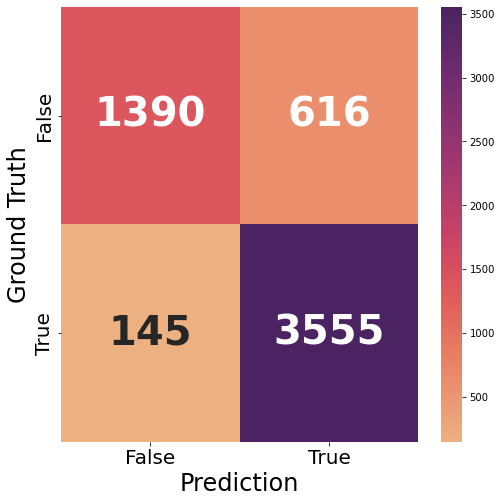

In [62]:
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_test, NN3_pred_class), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"}, cmap='flare')  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=20);
ax.set_yticklabels(labels, fontsize=20);
ax.set_xlabel('Prediction', fontsize=24);
ax.set_ylabel('Ground Truth', fontsize=24)

In [63]:
NN3_cr = classification_report(y_test, NN3_pred_class, target_names=RF.classes_, output_dict =True)
del NN3_cr['accuracy']
pd.DataFrame(NN3_cr).T

,precision,recall,f1-score,support
0,0.905537,0.692921,0.785089,2006.0
1,0.852314,0.960811,0.903316,3700.0
macro avg,0.878926,0.826866,0.844202,5706.0
weighted avg,0.871025,0.866632,0.861752,5706.0


In [64]:
print('ROC Area under the curve is {:.3f}'.format(roc_auc_score(y_test, NN3_pred_prob)))

ROC Area under the curve is 0.926


### ROC Comparison

In [65]:
from sklearn.metrics import roc_curve

In [66]:
RF_ROC = roc_curve(y_test, RF_pred_prob[:,1])
NN_ROC = roc_curve(y_test, NN_pred_prob)
NN2_ROC = roc_curve(y_test, NN2_pred_prob)
NN3_ROC = roc_curve(y_test, NN3_pred_prob)

In [67]:
RF_ROC_df = pd.DataFrame({'False Positive Rate':RF_ROC[0], 'True Positive Rate':RF_ROC[1], 'Model':'Random Forest'})
NN_ROC_df = pd.DataFrame({'False Positive Rate':NN_ROC[0], 'True Positive Rate':NN_ROC[1], 'Model':'Neural Network'})
NN2_ROC_df = pd.DataFrame({'False Positive Rate':NN2_ROC[0], 'True Positive Rate':NN2_ROC[1], 'Model':'Neural Network 2'})
NN3_ROC_df = pd.DataFrame({'False Positive Rate':NN3_ROC[0], 'True Positive Rate':NN3_ROC[1], 'Model':'Neural Network 3'})

In [68]:
plot_data = pd.concat([RF_ROC_df, NN_ROC_df, NN2_ROC_df, NN3_ROC_df]).reset_index(drop=True)

<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

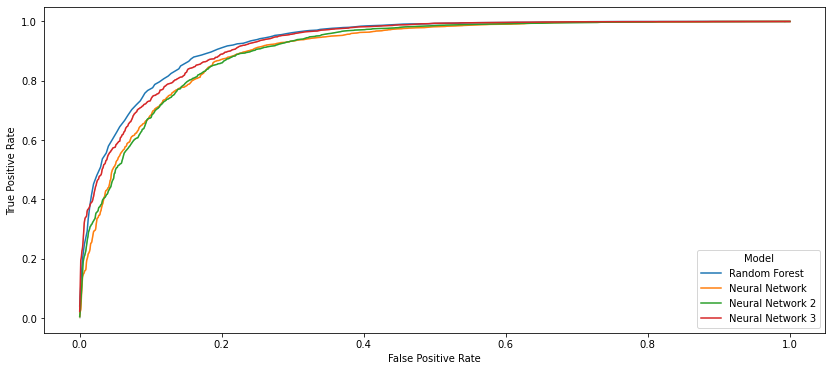

In [70]:
plt.figure(figsize=(14,6))
sns.lineplot(data=plot_data, x='False Positive Rate', y='True Positive Rate', hue='Model')

## Key findings

- The best performing model is Random forest with:
    - F1 score: 0.87
    - ROC Area under the curve: 0.932
- The Neural Networks models improve when the number of layers and the number of epochs are increased.
- The performance of the Neral NEtwork 3 is very close to the one of Random Forest.
- A Neural Network model could outperform Random Forest given an increment in number of layers and epochs. 

## Possible Flaws & Future Work

- A pwer transformation could have been applied to the skewed numerical features to make them more 'normal'.
- More tradidional classification models could have been tried to find an even better performance.
- The Random Forest model could have been improved by cross-validation and hyperparameter tuning.
- The Neural Network model could have been improved by increasing the number of epochs and layers, cross-validation and hyperparameter tuning of the learning rate.

## Author

Nicolas Hernandez

In [72]:
!jupyter nbconvert --to webpdf --no-input --allow-chromium-download DeepLearningProject-NicolasHernandez.ipynb

[NbConvertApp] Converting notebook DeepLearningProject-NicolasHernandez.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 505865 bytes to DeepLearningProject-NicolasHernandez.pdf
